In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [4]:
mobile_train = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
mobile_test = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv", index_col= "id")

In [5]:
mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
mobile_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


## Shape of Data

In [7]:
mobile_rows, mobile_cols = mobile_train.shape
mobile_rows_test, mobile_cols_test = mobile_test.shape

print("Shape of Mobile datas")
print(f"Mobile rows: {mobile_rows}")
print(f"Mobile Cols: {mobile_cols}")

print("\nShape of Mobile test datas")
print(f"Mobile rows: {mobile_rows_test}")
print(f"Mobile Cols: {mobile_cols_test}")

Shape of Mobile datas
Mobile rows: 2000
Mobile Cols: 21

Shape of Mobile test datas
Mobile rows: 1000
Mobile Cols: 20


## Null Values of Data

In [8]:
mobile_null = mobile_train.isnull().sum().sum()

print(f"Numbers of Null in Data: {mobile_null}")

Numbers of Null in Data: 0


## Categorical Cols

In [9]:
obj_cols = mobile_train.select_dtypes(include= ["object"]).columns
print(f'The Following Columns Have Dtype as Object \n: {obj_cols} \n')
print(f'The Value Count of Categorical Columns is : {obj_cols.value_counts().sum()}')

The Following Columns Have Dtype as Object 
: Index([], dtype='object') 

The Value Count of Categorical Columns is : 0


## Numerical Cols

In [10]:
num_cols = mobile_train.select_dtypes(include= ["float", "int"]).columns
print(f"The following cols has Float, int: \n{num_cols} \n")
print(f"Thee Value Count of Numerical Cols is: {num_cols.value_counts().sum()}")

The following cols has Float, int: 
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object') 

Thee Value Count of Numerical Cols is: 21


## Value Counts of Target

In [11]:
price_range = mobile_train.price_range.value_counts().reset_index()

price_range

,price_range,count
0,1,500
1,2,500
2,3,500
3,0,500


## Analyse Data

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# mobile_train.describe()

mobile_train.describe().loc[["min", "mean", "25%", "50%", "75%", "max"]].T.style.background_gradient(axis= 1)

,min,mean,25%,50%,75%,max
battery_power,501.000000,1238.518500,851.750000,1226.000000,1615.250000,1998.000000
blue,0.000000,0.495000,0.000000,0.000000,1.000000,1.000000
clock_speed,0.500000,1.522250,0.700000,1.500000,2.200000,3.000000
dual_sim,0.000000,0.509500,0.000000,1.000000,1.000000,1.000000
fc,0.000000,4.309500,1.000000,3.000000,7.000000,19.000000
four_g,0.000000,0.521500,0.000000,1.000000,1.000000,1.000000
int_memory,2.000000,32.046500,16.000000,32.000000,48.000000,64.000000
m_dep,0.100000,0.501750,0.200000,0.500000,0.800000,1.000000
mobile_wt,80.000000,140.249000,109.000000,141.000000,170.000000,200.000000
n_cores,1.000000,4.520500,3.000000,4.000000,7.000000,8.000000


In [13]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

##  Univariate Analysis

In [14]:
def print_feature_stats(df):
    num_cols = df.select_dtypes(include= ["float", "int"]).columns
    
    for feature in num_cols:
        feature_data = df[feature]
        feature_mean = feature_data.mean()
        feature_median = feature_data.median()
        feature_std = feature_data.std()
        feature_count = feature_data.count()

        print(f"Feature: {feature}")
        print(f"Mean: {feature_mean:.2f}")
        print(f"Median: {feature_median:.2f}")
        print(f"Standard Deviation: {feature_std:.2f}")
        print(f"Count: {feature_count}")
        print()

print_feature_stats(mobile_train)

Feature: battery_power
Mean: 1238.52
Median: 1226.00
Standard Deviation: 439.42
Count: 2000

Feature: blue
Mean: 0.49
Median: 0.00
Standard Deviation: 0.50
Count: 2000

Feature: clock_speed
Mean: 1.52
Median: 1.50
Standard Deviation: 0.82
Count: 2000

Feature: dual_sim
Mean: 0.51
Median: 1.00
Standard Deviation: 0.50
Count: 2000

Feature: fc
Mean: 4.31
Median: 3.00
Standard Deviation: 4.34
Count: 2000

Feature: four_g
Mean: 0.52
Median: 1.00
Standard Deviation: 0.50
Count: 2000

Feature: int_memory
Mean: 32.05
Median: 32.00
Standard Deviation: 18.15
Count: 2000

Feature: m_dep
Mean: 0.50
Median: 0.50
Standard Deviation: 0.29
Count: 2000

Feature: mobile_wt
Mean: 140.25
Median: 141.00
Standard Deviation: 35.40
Count: 2000

Feature: n_cores
Mean: 4.52
Median: 4.00
Standard Deviation: 2.29
Count: 2000

Feature: pc
Mean: 9.92
Median: 10.00
Standard Deviation: 6.06
Count: 2000

Feature: px_height
Mean: 645.11
Median: 564.00
Standard Deviation: 443.78
Count: 2000

Feature: px_width
Mean: 125

## Plotting Graph

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

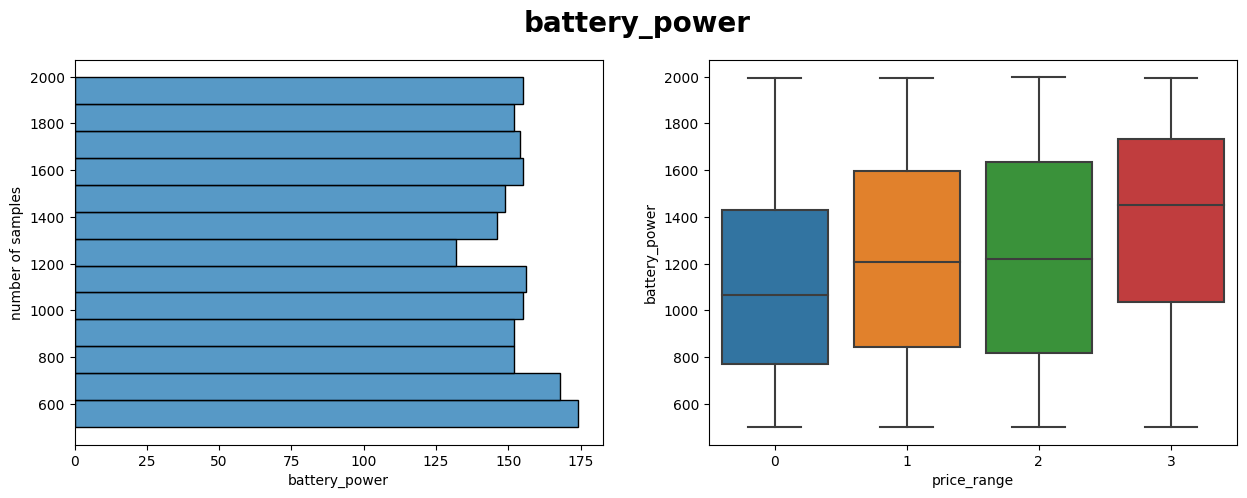

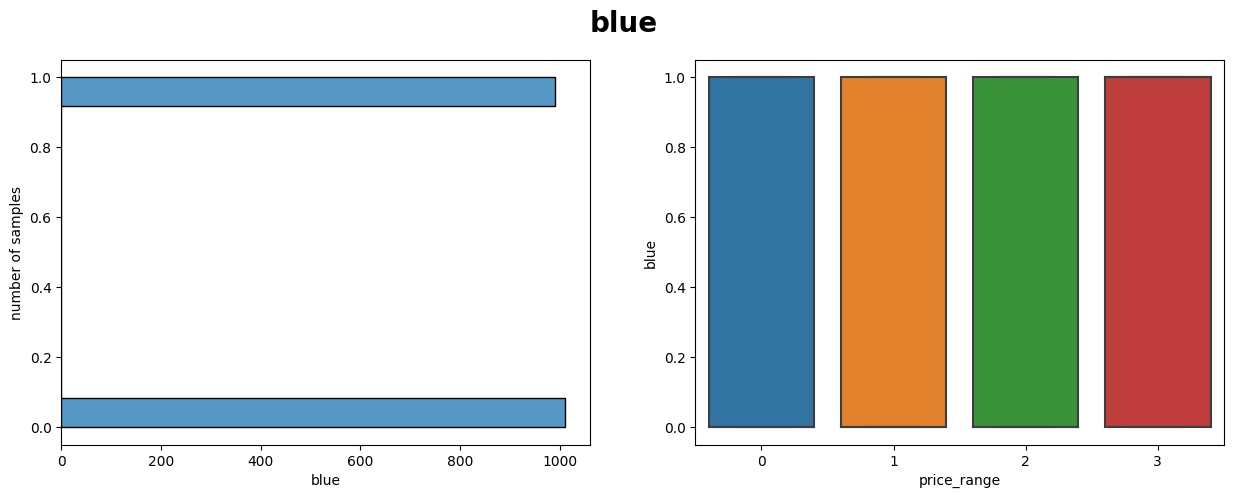

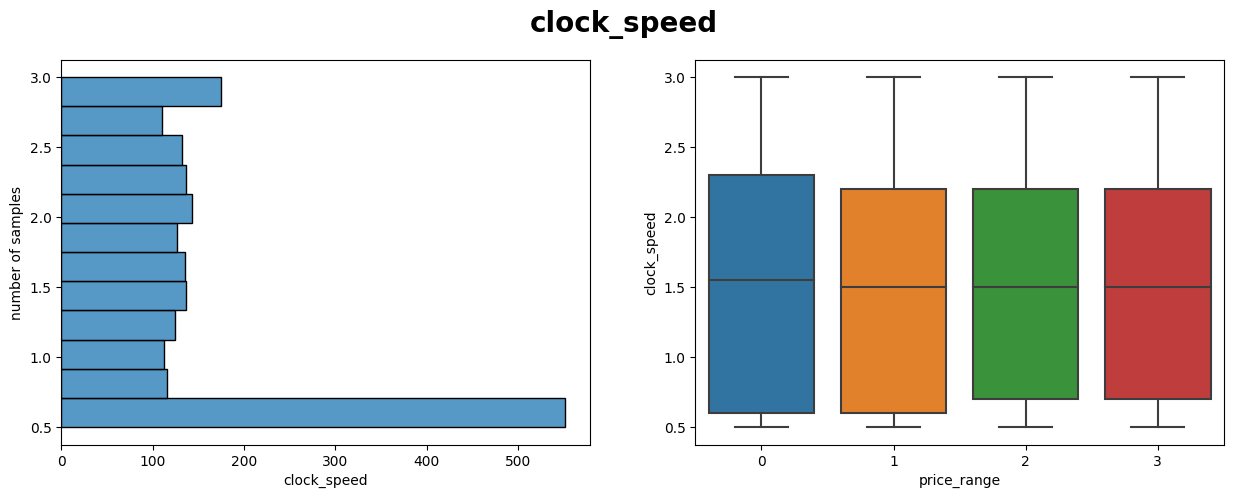

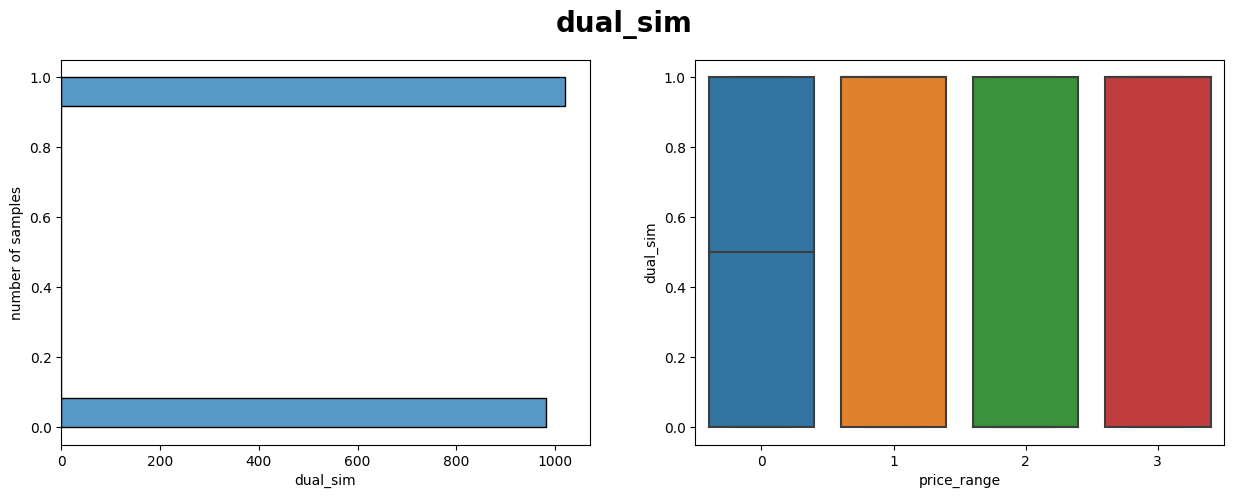

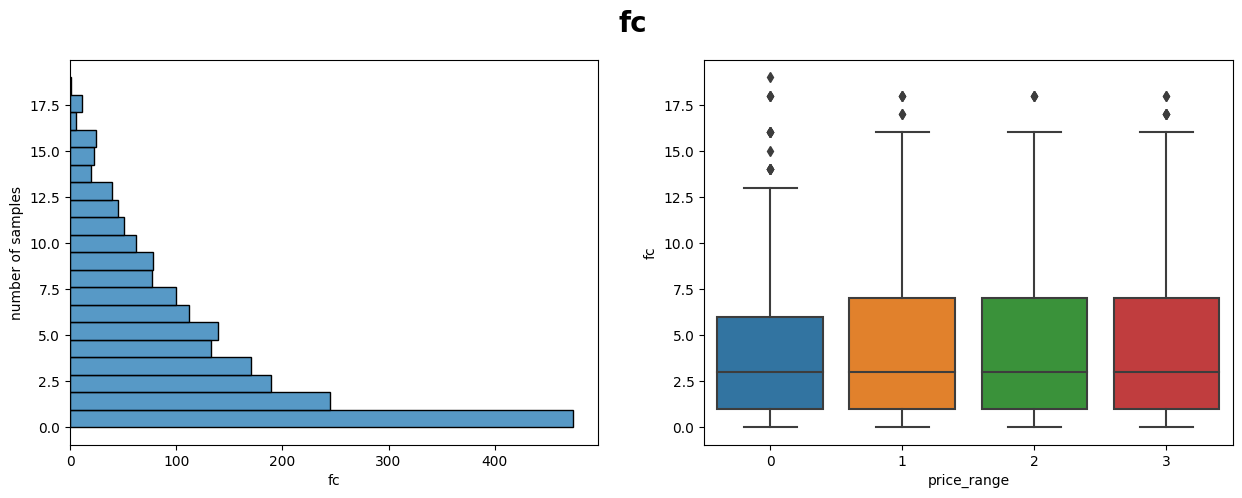

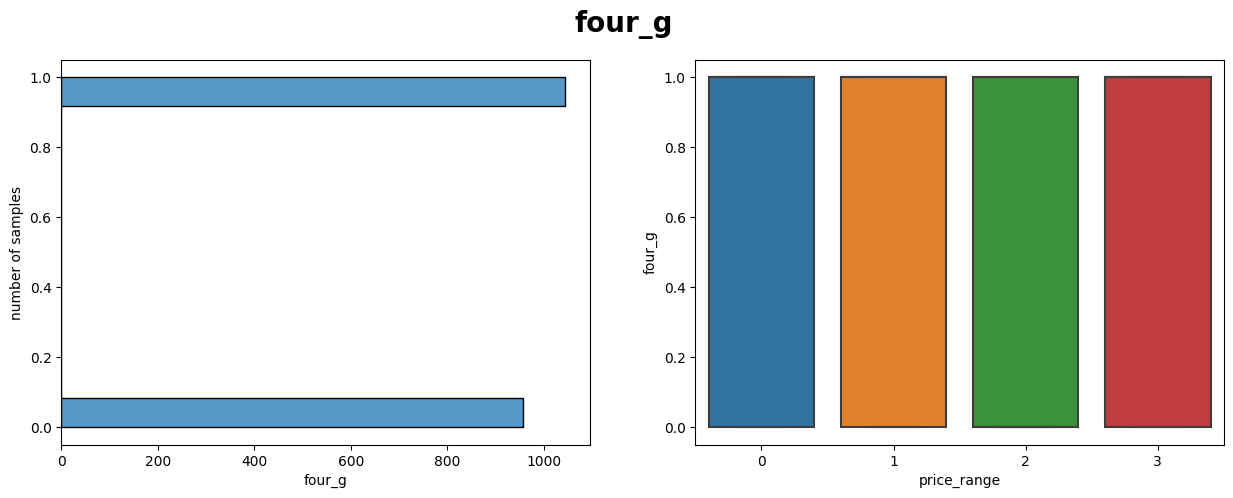

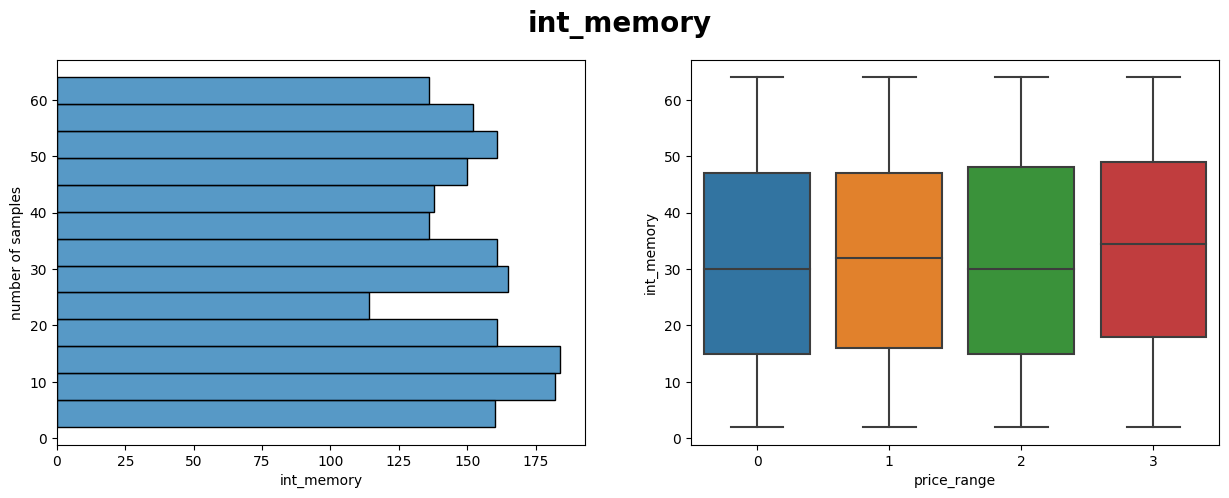

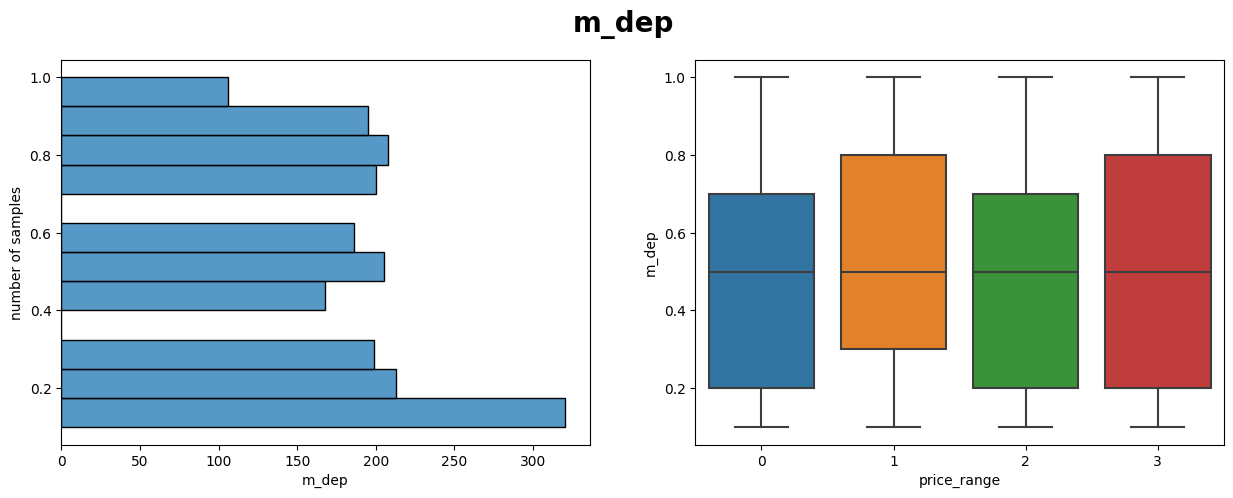

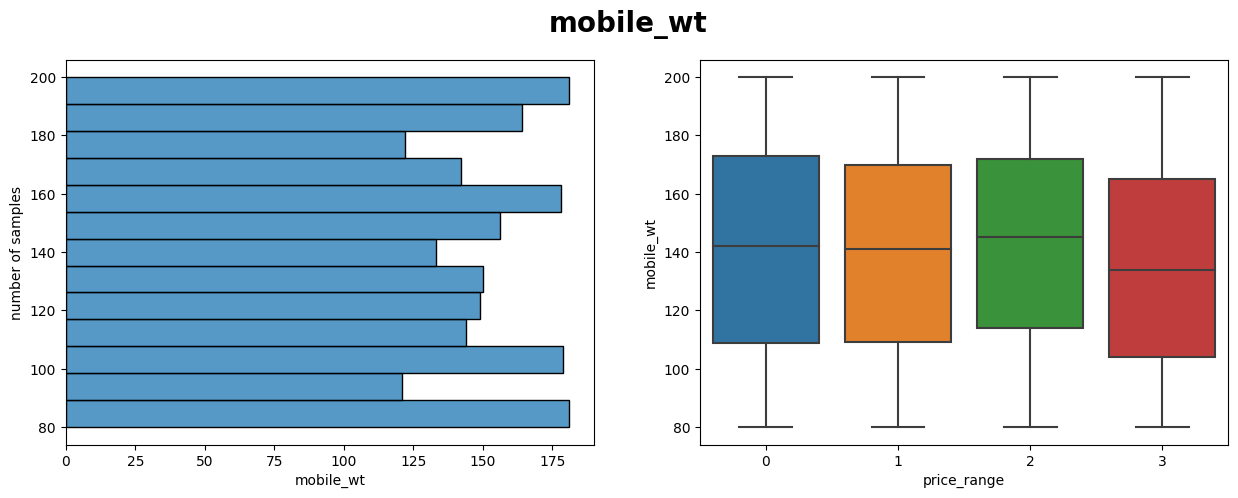

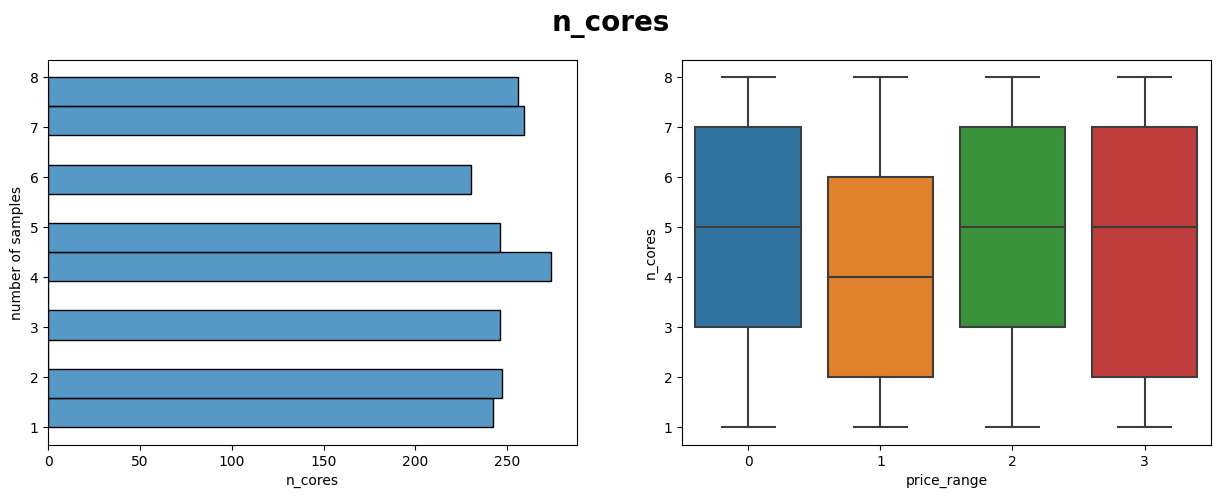

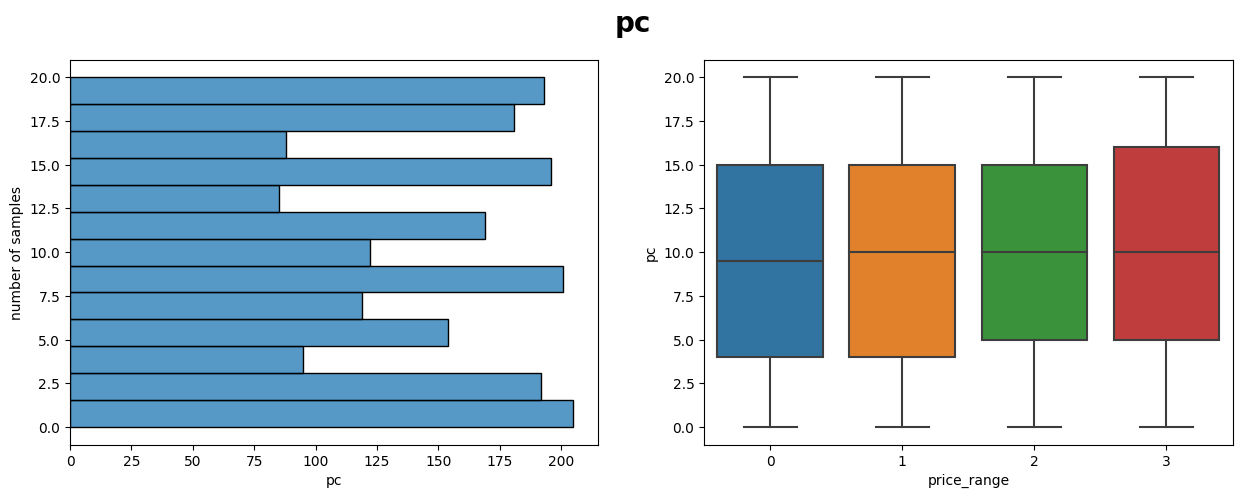

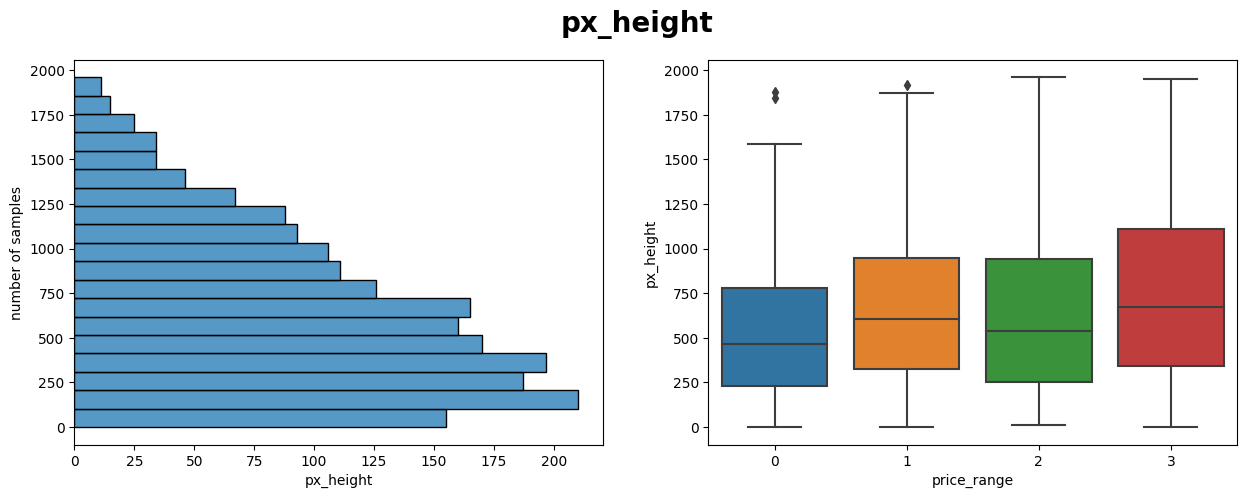

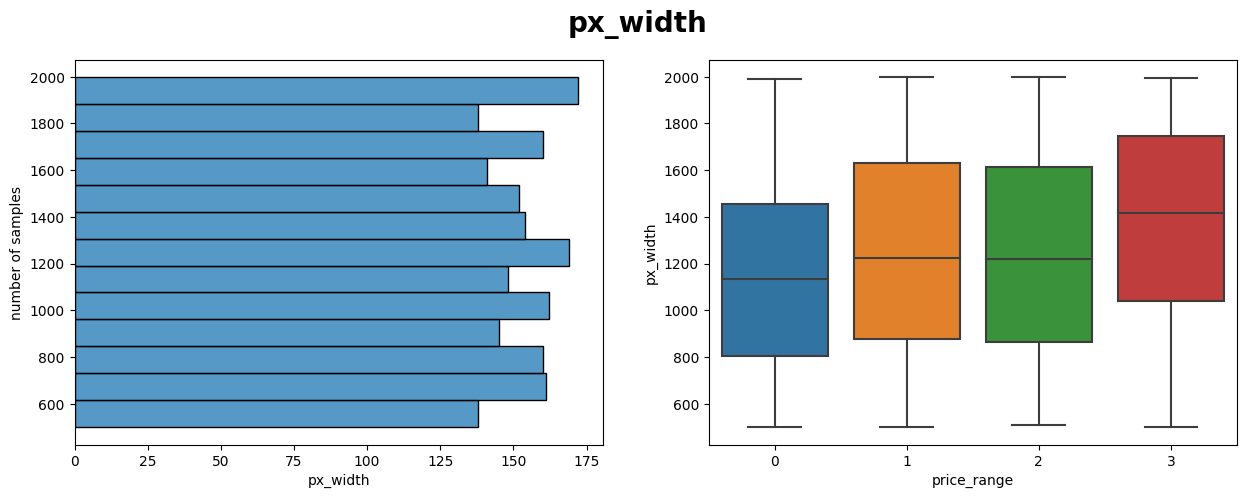

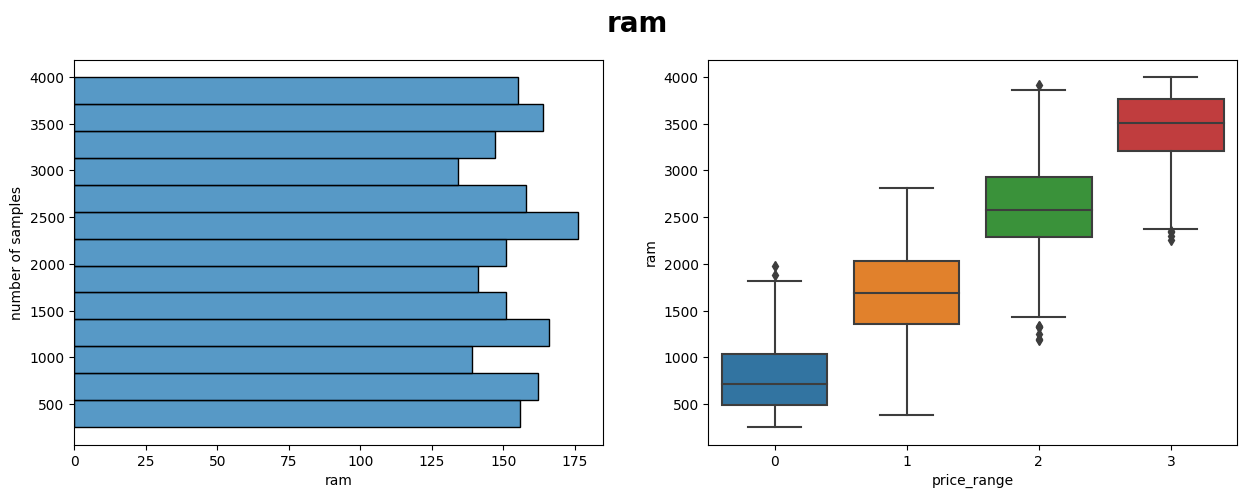

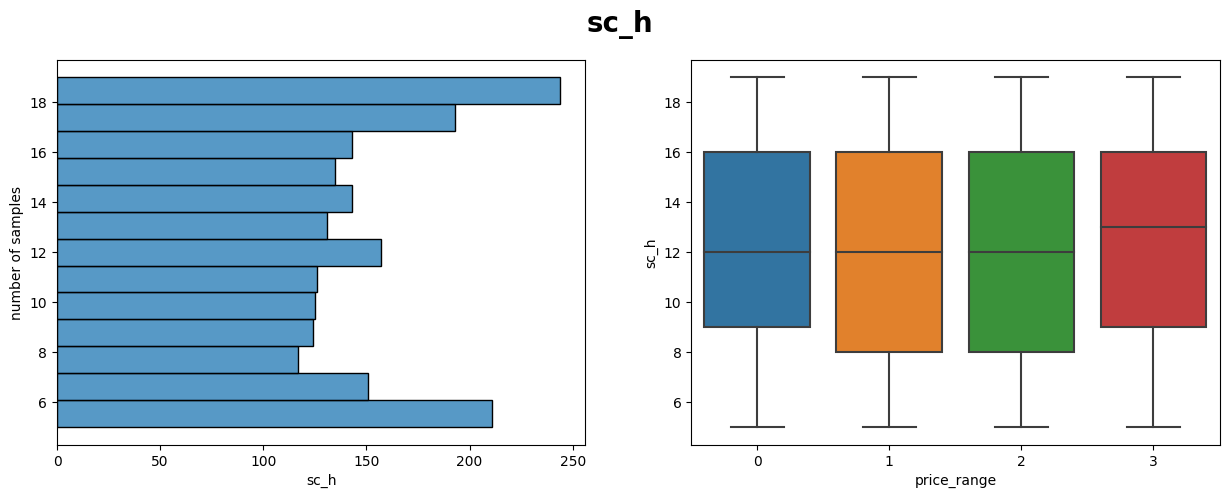

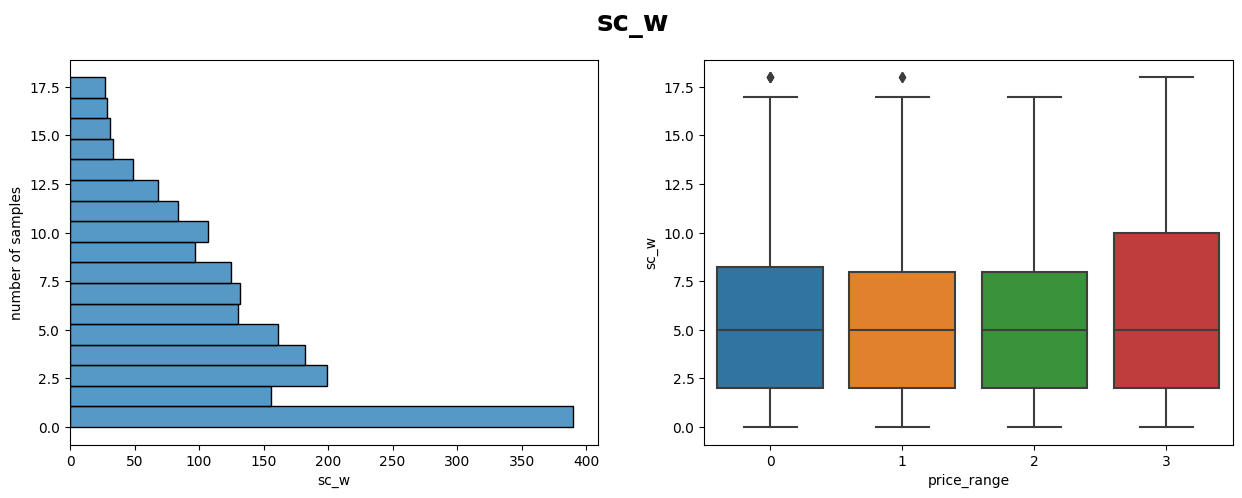

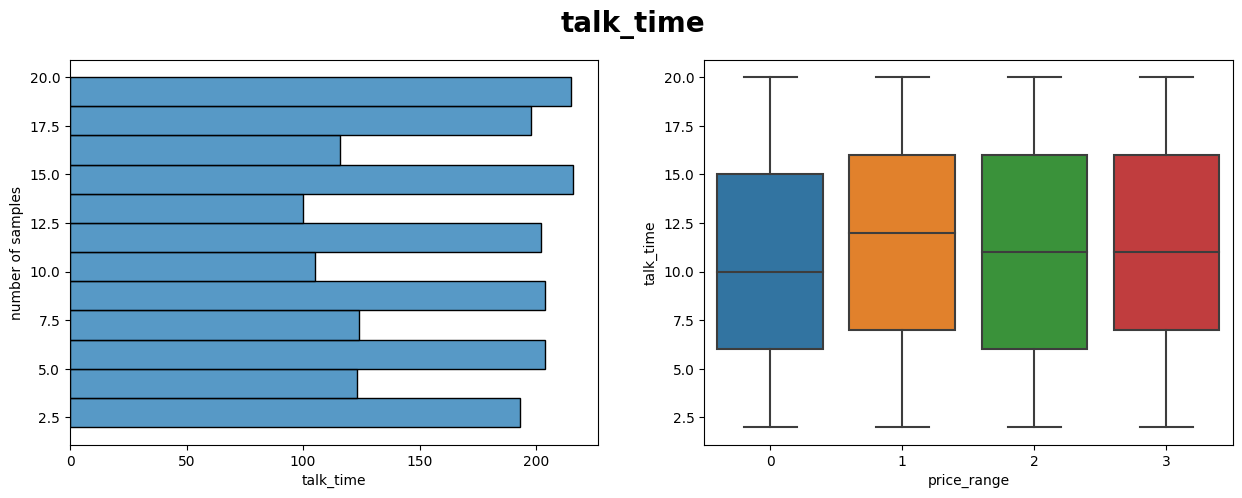

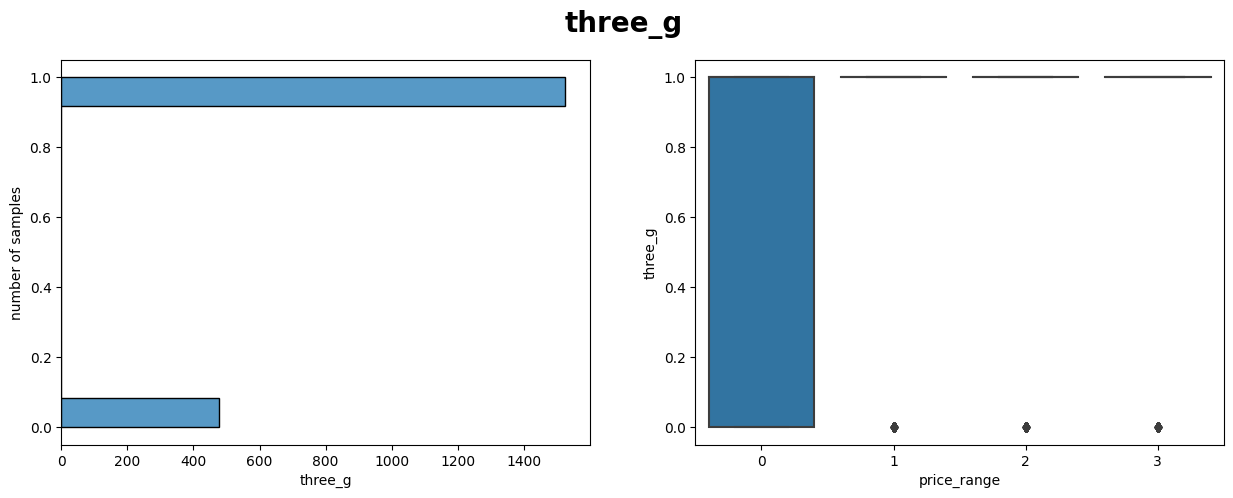

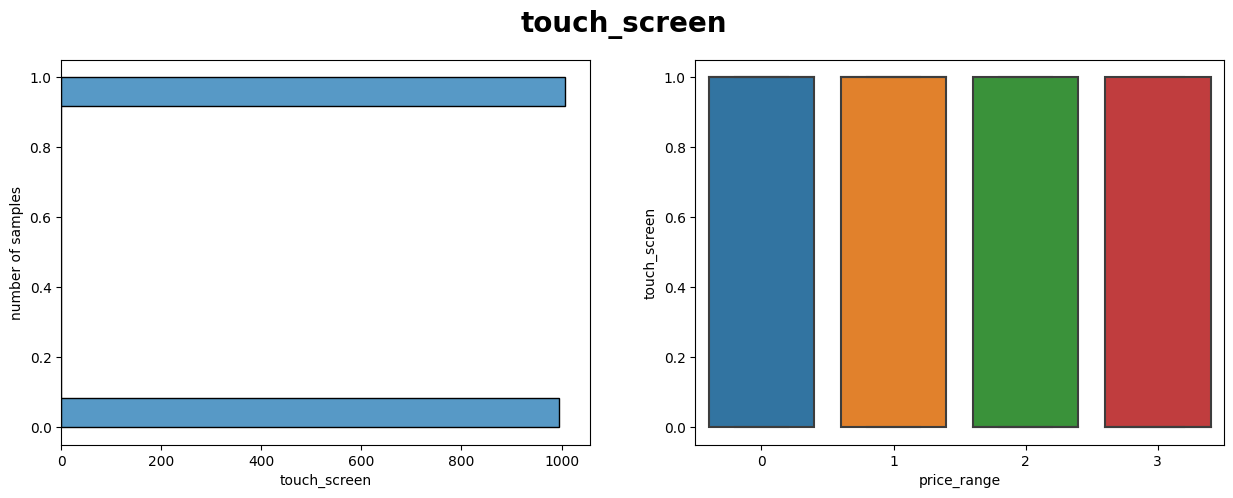

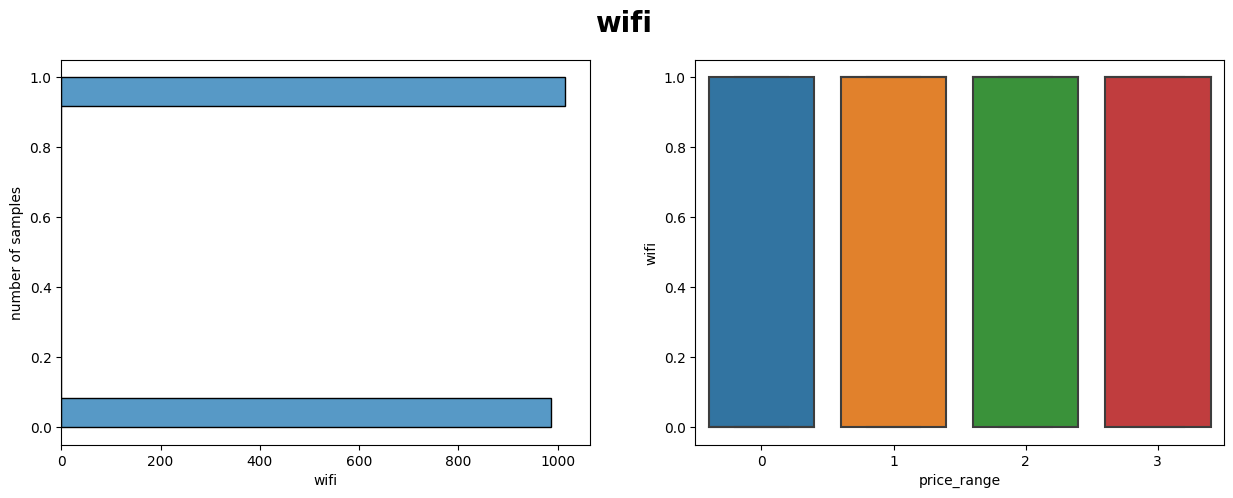

In [15]:
# selecting all excepting the last one

# Subplot- to draw multiple plots or graphs in once
# fig- entire container that holds all the plots
# axes- individual plot or graph within the figure

for col in mobile_train.columns[:-1]:
    # 1 row, 2 cols
    fig, ax = plt.subplots(1, 2, figsize= (15, 5))
    
    plt.suptitle(col, fontsize= 20, fontweight= "bold")

    # Left Ax
    ax0 = sns.histplot(y= col, data= mobile_train, ax= ax[0])
    ax0.bar_label(ax0.containers[0])
    ax0.set(xlabel=col, ylabel='number of samples')
    
    # Right Ax
    ax1 = sns.boxplot(x='price_range', y=col, data=mobile_train, ax=ax[1])

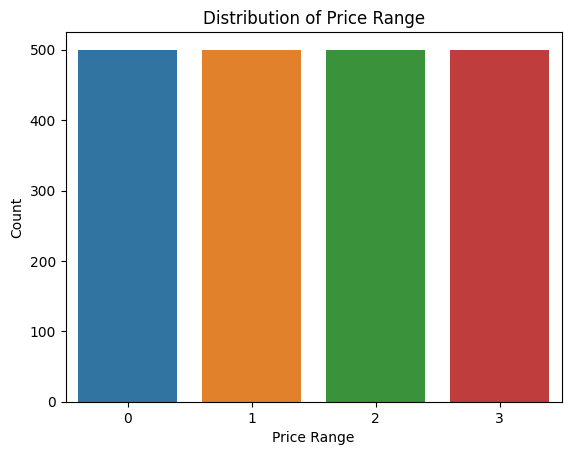

In [16]:
# mobile_train.boxplot(by= "price_range", figsize= (20,20))
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='price_range', data=mobile_train)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

In [17]:
# for feature in ["ram", "battery_power"]:
#     sns.histplot(mobile_train[feature], kde= True, bins= 30)
#     plt.title(f"Distribution of {feature}")
#     plt.xlabel(feature)
#     plt.ylabel("Frequency")
#     plt.show()

## Bivariate Analysis

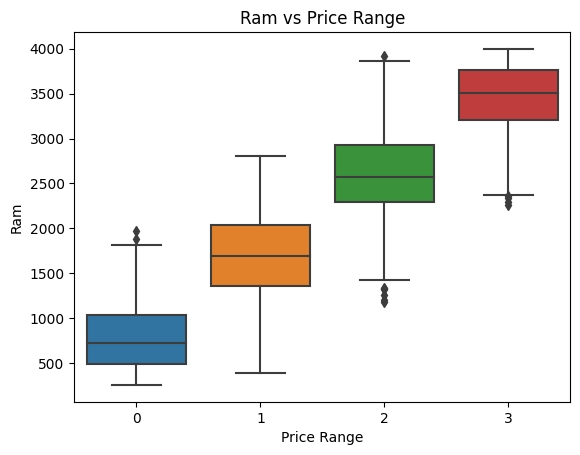

In [18]:
sns.boxplot(mobile_train, x= "price_range", y= "ram")
plt.title("Ram vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("Ram")
plt.show()

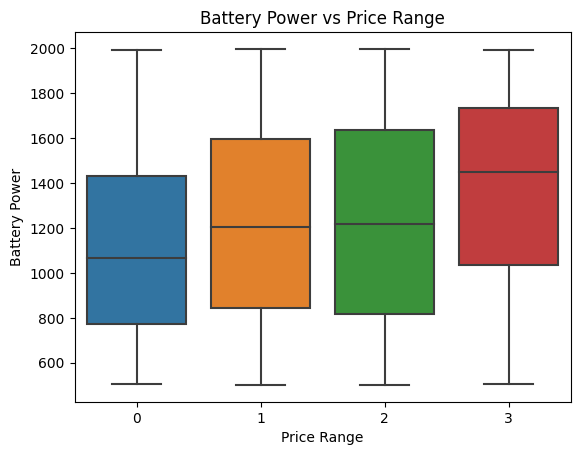

In [19]:
sns.boxplot(mobile_train, x= "price_range", y= "battery_power")
plt.title("Battery Power vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("Battery Power")
plt.show()

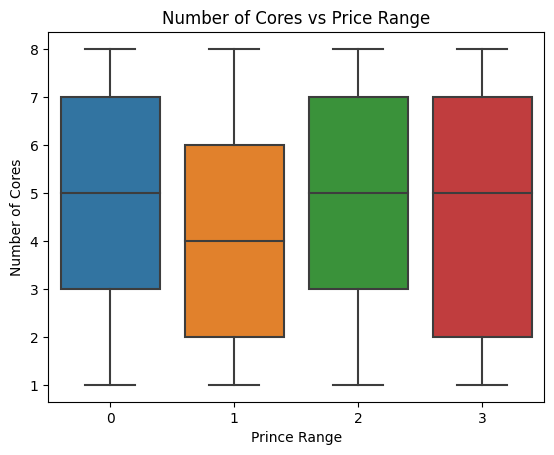

In [20]:
sns.boxplot(mobile_train, x= "price_range", y= "n_cores")
plt.title("Number of Cores vs Price Range")
plt.xlabel("Prince Range")
plt.ylabel("Number of Cores")
plt.show()

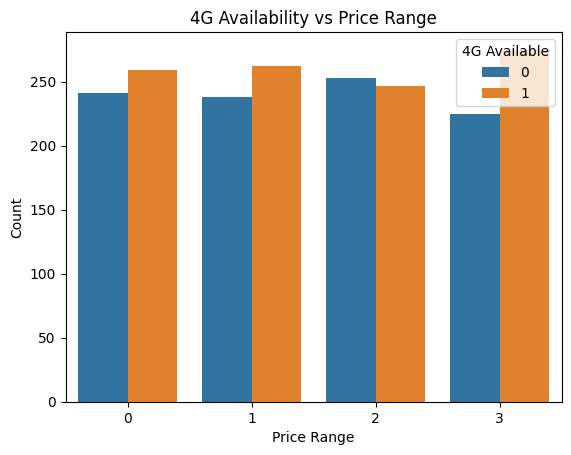

In [21]:
sns.countplot(mobile_train ,x='price_range', hue='four_g')
plt.title('4G Availability vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='4G Available', loc='upper right')
plt.show()

In [30]:
# correlation- connections between 2 or more things

corr = mobile_train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', annot_kws= {
    "fontsize": 12,
    "fontweight": "bold"
})
plt.title('Correlation Heatmap')
plt.show()

## Define

Since so many features, initially starting with all of the featurees to test things out-

Feature selection is a critical part of building an efficient and accurate machine learning model. 

Including too many features, especially irrelevant or redundant ones, can lead to issues like overfitting and increased computational cost without improving the model's performance.

### Compire Cols

In [ ]:
# Color output
from termcolor import colored

# cols in Train but not in Test
diff = []

for element in list(mobile_train.columns):
    if element not in list(mobile_test.columns):
        diff.append(element)

print(colored("{} is only in mobile_train DataFrame.".format(diff), "blue"))

In [ ]:
# cols in Test but not in Train
diff = []
for element in list(mobile_test.columns):
    if element not in list(mobile_train.columns):
        diff.append(element)

print(colored('{} is only in mobile_test DataFrame.'.format(diff), 'blue'))

### Feature Importance using Random Forest

In [31]:
X = mobile_train[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
y = mobile_train['price_range']

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state= 42)
rf.fit(X, y)

# Extract and display feature importance
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by= "Importance", ascending= False)

print(importance_df)

          Feature  Importance
13            ram    0.494163
0   battery_power    0.074602
12       px_width    0.057448
11      px_height    0.055640
8       mobile_wt    0.038960
6      int_memory    0.034699
16      talk_time    0.030347
15           sc_w    0.027892
10             pc    0.027459
14           sc_h    0.026547
2     clock_speed    0.026069
4              fc    0.024274
7           m_dep    0.023293
9         n_cores    0.022036
18   touch_screen    0.006620
3        dual_sim    0.006448
1            blue    0.006312
19           wifi    0.006255
5          four_g    0.006237
17        three_g    0.004702


### **What to Do Next:**
   - **Option 1**: **Use Top Features Based on Feature Importance**  
     You can choose to keep the most important features based on the Feature Importance output (e.g., **ram**, **battery_power**, **px_width**, **px_height**, etc.) and train your model using just these features. This can save computation time and still likely produce good results.
   
   - **Option 2**: **Apply PCA (if necessary)**  
     If you have a larger set of features and want to ensure no redundancy or high correlation, applying PCA might still be beneficial. After selecting the important features, you can apply PCA on them to reduce dimensionality while retaining key information.

In [33]:
#Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix

def evaluate_results(y_test, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1

### Define

In [34]:
# new X
X = mobile_train[["ram", "battery_power", "px_width", "px_height", "mobile_wt", "int_memory"]]
test = mobile_test[["ram", "battery_power", "px_width", "px_height", "mobile_wt", "int_memory"]]

y = mobile_train["price_range"]


In [35]:
X.columns == test.columns

array([ True,  True,  True,  True,  True,  True])

### Normalization

**`StandardScaler`** is a tool in **scikit-learn** that scales your data to have:

1. **Mean = 0**  
2. **Standard Deviation = 1**

This makes the data "standardized," ensuring all features are on the same scale, which is important for algorithms sensitive to feature magnitudes (e.g., SVM, Logistic Regression, KNN).

### Example in Simple Terms:
- If one feature (e.g., `age`) ranges from 0–100 and another (e.g., `salary`) ranges from 10,000–100,000, the large scale difference can cause bias in machine learning models.
- `StandardScaler` transforms both features to be on a similar scale, improving model performance.

### Key Formula:

z= (x-u)/o

Now, all features have similar ranges, helping your model perform better!

In [36]:
columns = X.columns

In [37]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

# fit-  Calculates the mean (μ) and standard deviation (σ) of each feature in the training data X.
# transform: Standardizes the training data using the formula

Norm_train = scaler.fit_transform(X)
Norm_test = scaler.transform(test)     # apply the same transformation as the training data, avoiding "data leakage"

# convert normalized data (Numpy arrays) -> DataFrame
X_train_full = pd.DataFrame(Norm_train, columns= columns)
X_test = pd.DataFrame(Norm_test, columns= columns)

In [38]:
X_train_full.describe().loc[["min", "mean", "std", "max"]].T.style.background_gradient(axis= 1)

,min,mean,std,max
ram,-1.722711,-0.000000,1.000250,1.727851
battery_power,-1.678817,0.000000,1.000250,1.728812
px_width,-1.739251,0.000000,1.000250,1.727608
px_height,-1.454027,0.000000,1.000250,2.963672
mobile_wt,-1.702391,0.000000,1.000250,1.688320
int_memory,-1.656260,-0.000000,1.000250,1.761380


## Modeling

What? Converts labels into one-hot encoded vectors.

Why? Helps models treat classes equally without numerical bias (e.g., thinking class "2" is greater than class "1").

When? Use for multi-class classification tasks (0,1,2) .

In [39]:
from tensorflow.keras.utils import to_categorical

y_OH = to_categorical(y)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_OH, train_size = 0.8, test_size = 0.2, random_state=0)

In [41]:
print(colored('<<< Variables shape >>>', 'blue'))
print('-'*30)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('--------------------------')
print('X_val', X_val.shape)
print('y_val', y_val.shape)
print('--------------------------')
print('X_test', X_test.shape)
print('y_test', X_test.shape[0])

<<< Variables shape >>>
------------------------------
X_train (1600, 6)
y_train (1600, 4)
--------------------------
X_val (400, 6)
y_val (400, 4)
--------------------------
X_test (1000, 6)
y_test 1000


In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
# from keras.activations import relu, elu, linear, sigmoid

# Create a Neuron Network model with 4 layer, activation='ELU'

model = models.Sequential()
model.add(layers.Dense(300, activation='elu', input_shape=(6, )))
model.add(layers.Dense(200, activation='elu'))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(75, activation='elu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['categorical_accuracy'])


early_stopping = EarlyStopping(
    monitor= "val_loss",
    patience = 5,
    restore_best_weights= True
)


history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_val, y_val),
                   callbacks= [early_stopping])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.4263 - loss: 1.2451 - val_categorical_accuracy: 0.6625 - val_loss: 0.8984
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.6173 - loss: 0.8654 - val_categorical_accuracy: 0.7375 - val_loss: 0.7079
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.7166 - loss: 0.7040 - val_categorical_accuracy: 0.8200 - val_loss: 0.6065
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.7945 - loss: 0.6126 - val_categorical_accuracy: 0.8725 - val_loss: 0.5299
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.8529 - loss: 0.5407 - val_categorical_accuracy: 0.9025 - val_loss: 0.4645
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.8966 - loss: 0.4738 - val_categorical_accuracy: 0.9275 - val_loss: 0.4097
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.9011 - loss: 0.4203 - val_categoric

In [47]:
# Evaluate model on test set
# test_loss, test_accuracy = model.evaluate(X_test, y_val)
# print(f"Test Accuracy: {test_accuracy:.2f}")

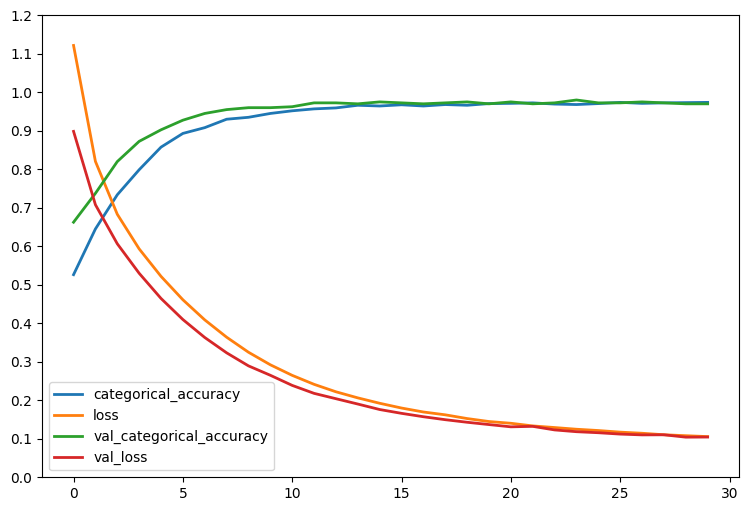

In [52]:
pd.DataFrame(history.history).plot(figsize= (9,6), linewidth= 2)
plt.yticks(np.arange(0, 1.3, 0.1))
plt.show()

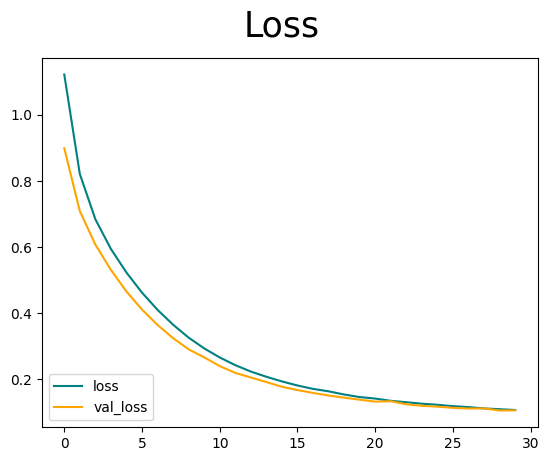

In [53]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(history.history["loss"], color= "teal", label= "loss")
plt.plot(history.history["val_loss"], color= "orange", label= "val_loss")
fig.suptitle("Loss", fontsize= 25)
plt.legend(loc= "lower left")
plt.show()

In [54]:
# y_pred is probability of each class for each sample

y_proba = model.predict(X_test)
y_proba

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[5.7495821e-13, 8.3759033e-08, 3.6354139e-01, 6.3645858e-01],
       [1.2924940e-15, 5.4772058e-11, 5.8033024e-03, 9.9419665e-01],
       [4.5815070e-12, 1.4438190e-06, 7.3232234e-01, 2.6767612e-01],
       ...,
       [8.3721048e-01, 1.6278616e-01, 3.3477272e-06, 8.6057952e-09],
       [2.1250801e-07, 3.2013949e-02, 9.6771145e-01, 2.7430896e-04],
       [2.7241207e-09, 6.3427084e-04, 9.9481100e-01, 4.5547411e-03]],
      dtype=float32)

In [55]:
# Each samples predicted class
y_pred = np.argmax(y_proba, axis= 1)
y_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 2, 3, 2, 2, 1, 1, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

### Saving model

In [56]:
model.save("mobile_price_seq_0.98.h5")

In [ ]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_leaf_nodes= 5, random_state= 0)
model.fit(X_train, y_train)
preds_val = model.predict(X_val)

# Evaluate
accuracy = accuracy_score(y_val, preds_val)
print(f"Validation Accuracy for DecisionTreeClassifier: {accuracy:.2f}")

accuracy_dt = evaluate_results(y_val, preds_val)

In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state= 0)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

# Evaluate
accuracy = accuracy_score(y_val, rf_preds)
print(f"Validation Accuracy for RandomForestClassifier: {accuracy:.2f}")

accuracy_rf = evaluate_results(y_val, rf_preds)

In [ ]:
# SVM (Support Vector Machine)

from sklearn.svm import SVC

svm = SVC(kernel= "linear", C= 1.0, decision_function_shape= "ovr")
svm.fit(X_train, y_train)

svm_preds = svm.predict(X_val)

accuracy_svm = evaluate_results(y_val, svm_preds)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)

knn_preds = knn.predict(X_val)

accuracy_knn = evaluate_results(y_val, knn_preds)

### Conclusion of model trainings

In [ ]:
model_names = ["DTC", "RFC", "SVM", "KNN"]
accuracies = [accuracy_dt[0], accuracy_rf[0], accuracy_svm[0], accuracy_knn[0]]

plt.bar(model_names, accuracies)
plt.title("Models Accuracies")
plt.xlabel("Model Names")
plt.ylabel("Accuracies")
plt.show()